<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Aula09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geocodificação
É um processo de transformar nomes de lugares ou endereços de um conjunto de dados para coordenadas. 

Vamos utilizar a biblioteca geopy https://geopy.readthedocs.io/en/stable/.

Existem diversos serviços de geocodificação, vamos utilizar o Open Street Map

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [4]:
caminho = r"/content/sample_data/parques_sp.csv"
dados = pd.read_csv(caminho, sep=';')

In [5]:
dados

,name,address
0,Parque Villa-Lobos,"Avenida Prof. Fonseca Rodrigues, 2001 - Alto d..."
1,Parque Tenente Siqueira Campos - Trianon,"Rua Peixoto Gomide, 949 - Cerqueira César, São..."
2,Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau..."
3,Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP"
4,Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP"
5,Parque Alfredo Volpi,"Rua Engenheiro Oscar Americano, 480 - Morumbi,..."
6,Parque Ecológico do Tietê,"Rodovia Parque, 8055 - Vila Santo Henrique, Sã..."


In [6]:
from geopandas.tools import geocode

In [7]:
dados_geo = geocode(dados['address'], provider='nominatim', user_agent='geodev_06')

In [8]:
dados_geo

,geometry,address
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P..."
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo..."
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ..."
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im..."
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im..."
5,POINT (-46.70407 -23.59171),"Rua Engenheiro Oscar Americano, 840, Avenida E..."
6,POINT (-48.52884 -20.71022),"Rodovia Brigadeiro Faria Lima, Loteamento Sant..."


In [9]:
type(dados_geo)

geopandas.geodataframe.GeoDataFrame

In [10]:
dados_geo = dados_geo.rename(columns={'address':'endereco'})

In [11]:
dados_geo

,geometry,endereco
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P..."
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo..."
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ..."
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im..."
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im..."
5,POINT (-46.70407 -23.59171),"Rua Engenheiro Oscar Americano, 840, Avenida E..."
6,POINT (-48.52884 -20.71022),"Rodovia Brigadeiro Faria Lima, Loteamento Sant..."


In [12]:
dados_geo_join = dados_geo.join(dados)
dados_geo_join

,geometry,endereco,name,address
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P...",Parque Villa-Lobos,"Avenida Prof. Fonseca Rodrigues, 2001 - Alto d..."
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo...",Parque Tenente Siqueira Campos - Trianon,"Rua Peixoto Gomide, 949 - Cerqueira César, São..."
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ...",Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau..."
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im...",Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP"
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im...",Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP"
5,POINT (-46.70407 -23.59171),"Rua Engenheiro Oscar Americano, 840, Avenida E...",Parque Alfredo Volpi,"Rua Engenheiro Oscar Americano, 480 - Morumbi,..."
6,POINT (-48.52884 -20.71022),"Rodovia Brigadeiro Faria Lima, Loteamento Sant...",Parque Ecológico do Tietê,"Rodovia Parque, 8055 - Vila Santo Henrique, Sã..."


In [13]:
# Salvar esse arquivo 
local_saida = "/content/dados_parque_sp.shp"
dados_geo_join.to_file(local_saida)

# Plotando o mapa

In [14]:
import folium

In [15]:
dados_geo_join.head()

,geometry,endereco,name,address
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P...",Parque Villa-Lobos,"Avenida Prof. Fonseca Rodrigues, 2001 - Alto d..."
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo...",Parque Tenente Siqueira Campos - Trianon,"Rua Peixoto Gomide, 949 - Cerqueira César, São..."
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ...",Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau..."
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im...",Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP"
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im...",Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP"


In [16]:
dados_geo_join.tail()

,geometry,endereco,name,address
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ...",Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau..."
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im...",Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP"
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im...",Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP"
5,POINT (-46.70407 -23.59171),"Rua Engenheiro Oscar Americano, 840, Avenida E...",Parque Alfredo Volpi,"Rua Engenheiro Oscar Americano, 480 - Morumbi,..."
6,POINT (-48.52884 -20.71022),"Rodovia Brigadeiro Faria Lima, Loteamento Sant...",Parque Ecológico do Tietê,"Rodovia Parque, 8055 - Vila Santo Henrique, Sã..."


In [17]:
# Point(x, y) Longitude, Latitude
# Longitude
dados_geo_join['geometry'].x

0   -46.727251
1   -46.661457
2   -46.623804
3   -46.635213
4   -46.610412
5   -46.704069
6   -48.528839
dtype: float64

In [18]:
# Latitude
dados_geo_join['geometry'].y

0   -23.546767
1   -23.565159
2   -23.563411
3   -23.534735
4   -23.589537
5   -23.591714
6   -20.710220
dtype: float64

In [19]:
dados_geo_join['Longitude'] = dados_geo_join['geometry'].x
dados_geo_join['Latitude'] = dados_geo_join['geometry'].y

In [20]:
dados_geo_join.head()

,geometry,endereco,name,address,Longitude,Latitude
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P...",Parque Villa-Lobos,"Avenida Prof. Fonseca Rodrigues, 2001 - Alto d...",-46.727251,-23.546767
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo...",Parque Tenente Siqueira Campos - Trianon,"Rua Peixoto Gomide, 949 - Cerqueira César, São...",-46.661457,-23.565159
2,POINT (-46.62380 -23.56341),"Rua Muniz de Souza, Aclimação, Liberdade, São ...",Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau...",-46.623804,-23.563411
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im...",Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP",-46.635213,-23.534735
4,POINT (-46.61041 -23.58954),"Avenida Nazaré, Ipiranga, São Paulo, Região Im...",Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP",-46.610412,-23.589537


In [21]:
# location = [latitude, longitude]
m = folium.Map(location=[-23.54, -46.72], tiles='openstreetmap', zoom_start=10)

for i, row in dados_geo_join.iterrows():
    folium.Marker([row['geometry'].y, row['geometry'].x], popup=row['name']).add_to(m)

m

# Pontos dentro de um Polígono

In [22]:
from shapely.geometry import Point, Polygon, MultiPolygon

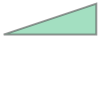

In [23]:
triangulo = Polygon([(1,2), (4,2), (4,3)])
triangulo

In [24]:
ponto1 = triangulo.centroid
ponto2 = Point(0,1)

In [25]:
ponto1.within(triangulo)

True

In [26]:
ponto2.within(triangulo)

False

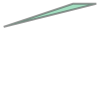

In [27]:
triangulo2 = Polygon([(1,2), (5,3), (4,3)])
triangulo2

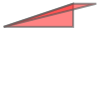

In [28]:
MultiPolygon([triangulo, triangulo2])

In [29]:
triangulo.intersects(triangulo2)

True

In [30]:
import geopandas as gpd

In [31]:
dados = gpd.read_file(r"C:\AmbientalPro\Extras\BR_Municipios_2021\BR_Municipios_2021.shp")
dados.head()

ERROR:fiona._env:C:\AmbientalPro\Extras\BR_Municipios_2021\BR_Municipios_2021.shp: No such file or directory


DriverError: ignored

In [ ]:
dados = dados.loc[dados.SIGLA == 'SP']
dados.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
3267,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
3268,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
3269,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3270,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
3271,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [ ]:
dados_sp = dados
dados_sp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dados_geo_join.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
dados_geo_join = dados_geo_join.to_crs(epsg=4674)

In [ ]:
dados_geo_join.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dados_geo_join.crs == dados_sp.crs

True

<AxesSubplot:>

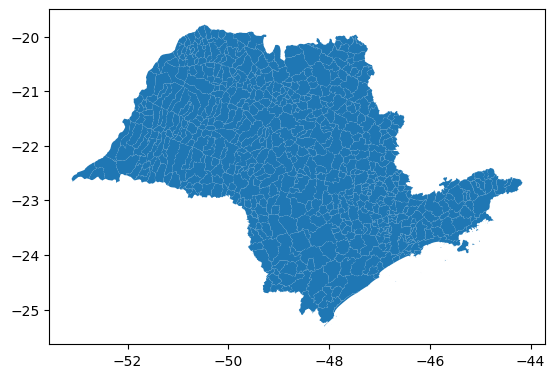

In [ ]:
dados_sp.plot()

In [ ]:
mun_sp = dados_sp.loc[dados_sp['NM_MUN'] == 'São Paulo']
mun_sp.reset_index(drop=True, inplace=True)
mun_sp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


<AxesSubplot:>

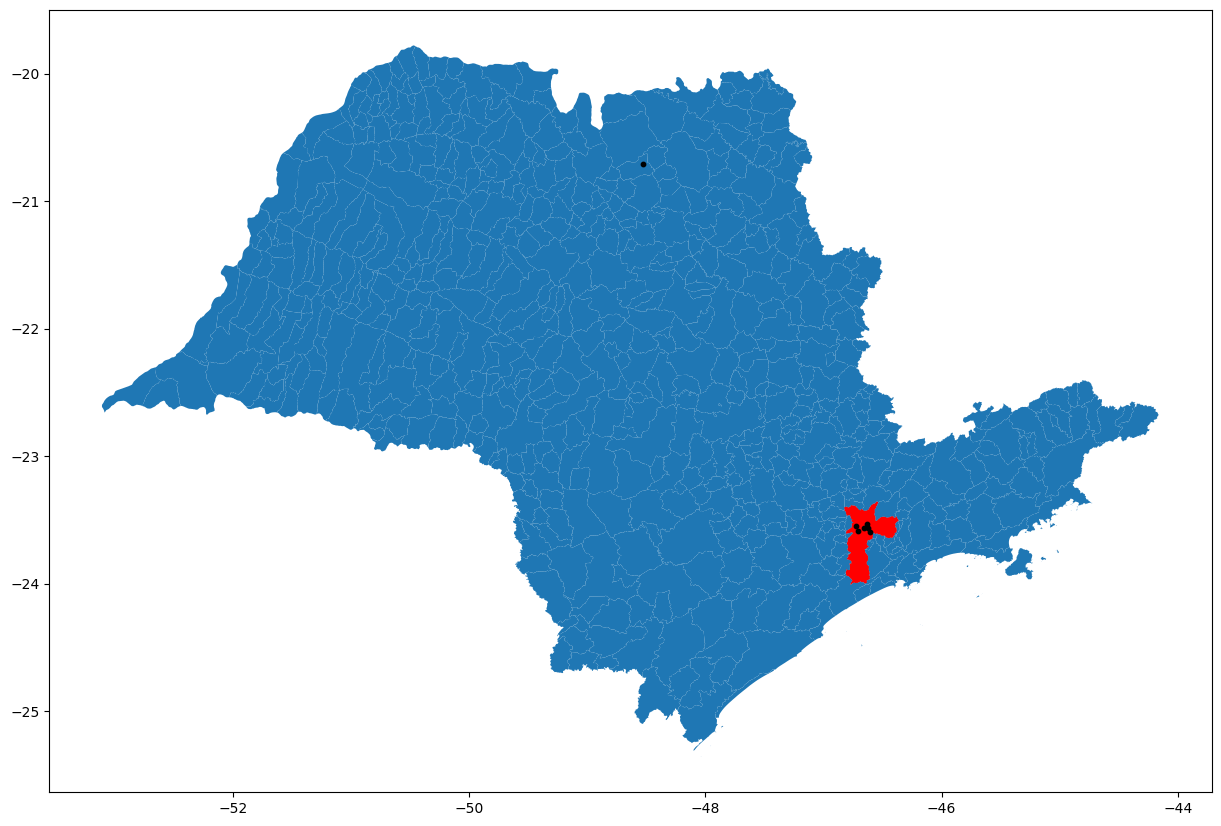

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

dados_sp.plot(ax=ax)
mun_sp.plot(ax=ax, facecolor='red')

dados_geo_join.plot(ax=ax, color='black', markersize=10)

In [ ]:
from shapely import speedups
speedups.enabled

True

In [ ]:
mascara_local = dados_geo_join.within(mun_sp.at[0,'geometry'])
print(mascara_local)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
dtype: bool


# Análise de vizinho mais próximo

In [ ]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [ ]:
ponto_origem = Point(2, 3)

ponto1 = Point(0,1)
ponto2 = Point(3,2)
ponto3 = Point(4,5)

In [ ]:
destino = MultiPoint([ponto1, ponto2, ponto3])
print(destino)

MULTIPOINT (0 1, 3 2, 4 5)


In [ ]:
vizinho_proximo = nearest_points(ponto_origem, destino)

In [ ]:
vizinho_proximo

(<shapely.geometry.point.Point at 0x19fa923fc10>,
 <shapely.geometry.point.Point at 0x19fa72e8370>)

In [ ]:
# o índice 1 retorna o ponto mais próximo
print(vizinho_proximo[1])

POINT (3 2)


In [ ]:
import geopandas as gpd

In [ ]:
ponto = Point(-46.63, -23.52)

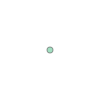

In [ ]:
ponto

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Central_Point':'São Paulo',
    'geometry':['POINT(-46.63 -23.52)']
})
df

,Central_Point,geometry
0,São Paulo,POINT(-46.63 -23.52)


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
from shapely import wkt

In [ ]:
df['geometry'] = df['geometry'].apply(wkt.loads)

In [ ]:
df

,Central_Point,geometry
0,São Paulo,POINT (-46.63 -23.52)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [ ]:
gdf

,Central_Point,geometry
0,São Paulo,POINT (-46.63000 -23.52000)


In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dados_geo_join.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
from pyproj import CRS

gdf.crs = CRS.from_epsg(4674)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dados_geo_join

,geometry,endereco,name,address,Longitude,Latitude
0,POINT (-46.72725 -23.54677),"Biblioteca Parque Villa Lobos, 2001, Avenida P...",Parque Villa-Lobos,"Avenida Prof. Fonseca Rodrigues, 2001 - Alto d...",-46.727251,-23.546767
1,POINT (-46.66146 -23.56516),"Rua Peixoto Gomide, Jardim Paulista, São Paulo...",Parque Tenente Siqueira Campos - Trianon,"Rua Peixoto Gomide, 949 - Cerqueira César, São...",-46.661457,-23.565159
2,POINT (-46.62396 -23.56194),"Rua Muniz de Souza, Aclimação, Liberdade, São ...",Parque Aclimação,"Rua Muniz de Sousa, 1.119 - Aclimação, São Pau...",-46.623962,-23.561940
3,POINT (-46.63521 -23.53474),"Praça da Luz, Bom Retiro, São Paulo, Região Im...",Parque Jardim da Luz,"Praça da Luz, s/n - Bom Retiro, São Paulo - SP",-46.635213,-23.534735
4,POINT (-46.61005 -23.59334),"Avenida Nazaré, Ipiranga, São Paulo, Região Im...",Parque Independência,"Avenida Nazaré, s/n - Ipiranga, São Paulo - SP",-46.610048,-23.593336
5,POINT (-46.70407 -23.59171),"Rua Engenheiro Oscar Americano, 840, Avenida E...",Parque Alfredo Volpi,"Rua Engenheiro Oscar Americano, 480 - Morumbi,...",-46.704069,-23.591714
6,POINT (-48.52884 -20.71022),"Rodovia Brigadeiro Faria Lima, Loteamento Sant...",Parque Ecológico do Tietê,"Rodovia Parque, 8055 - Vila Santo Henrique, Sã...",-48.528839,-20.710220


In [ ]:
data_union = dados_geo_join.unary_union
print(data_union)

MULTIPOINT (-48.5288392 -20.7102202, -46.72725062401455 -23.546767449999997, -46.704069 -23.591714, -46.6614571 -23.5651589, -46.635213 -23.5347351, -46.6239615 -23.5619401, -46.6100481 -23.5933358)


In [ ]:
ponto_proximo = nearest_points(gdf['geometry'][0], data_union)
print(ponto_proximo)

(<shapely.geometry.point.Point object at 0x0000019FA730DF90>, <shapely.geometry.point.Point object at 0x0000019FA72E8940>)


In [ ]:
print(ponto_proximo[1])

POINT (-46.635213 -23.5347351)
